In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime,date, timedelta
import shutil
import time
import pyautogui as pg
import time
import win32com.client as client
import ahmedsabri

In [4]:
common_path=r'\\eprom\fs\technical\Macro'
# number of days before yesterday i.e, 1 if the day before yesterday
ttt=1
date=datetime.now()-timedelta(ttt)
d=str(date.day)
m=str(date.month)
m2='0'+str(date.month)
y=str(date.year)
if os.path.isdir(os.path.join(common_path,y,m2,d+'_'+m+'_'+y)):
    path_day=os.path.join(common_path,y,m2,d+'_'+m+'_'+y)
else:
    path_day=os.path.join(common_path,y,m,d+'_'+m+'_'+y)
os.chdir(path_day)
print(path_day)

\\eprom\fs\technical\Macro\2023\03\1_3_2023


In [5]:
os.chdir(path_day)
base=os.path.basename(os.getcwd())
try:
    U_2=pd.read_excel('Unit02'+' '+base+'.xls', header = 7, usecols='a:c,e:ab',skiprows=[15,34,49,50,66,67,127])
except:
    pass
try:
    U_2_new=pd.read_excel('Unit02_New'+' '+base+'.xls', header = 7, usecols='a:c,e:ab')
except:
    pass
try:
    U_4=pd.read_excel('Unit04'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    U_4_new=pd.read_excel('Unit04_New'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    U_5=pd.read_excel('Unit05'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    U_5_new=pd.read_excel('Unit05_New'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    U_8=pd.read_excel('Unit08'+' '+base+'.xls', header = 4, usecols='a,b,d,e:ab',skiprows=[175],sheet_name='Plant Data')
except:
    pass
try:
    U_8_new=pd.read_excel('Unit08_new'+' '+base+'.xls', header = 4, usecols='a,b,d,e:ab',sheet_name='Plant Data')
except:
    pass
try:
    U_9=pd.read_excel('Unit09'+' '+base+'.xls', header = 4, usecols='a,b,d,e:ab',sheet_name='Plant Data')
except:
    pass
try:
    U_25=pd.read_excel('Unit25'+' '+base+'.xls', header= 4, usecols='a:c,e:ab', skiprows=[32,33,34,46,47,48,64,65,66,86,87,88,96,97,98,120,121,122])
except:
    pass
try:
    U_12=pd.read_excel('Unit12'+' '+base+'.xls', header= 4, usecols='a:c,e:ab', skiprows=[101,102,106,107,110,113,118,121,122,125,128,131,134,137,140,141])
except:
    pass
try:
    U_12_new=pd.read_excel('Unit12_New'+' '+base+'.xls', header= 4, usecols='a:c,e:ab')
except:
    pass        
try:
    CEMS=pd.read_excel('CEMS'+' '+base+'.xls',header = 4, usecols='b,c,e:ac ')
except:
    pass
try:
    U_1=pd.read_excel('Unit01'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass    
try:
    U_11=pd.read_excel('Unit11'+' '+base+'.xls', header = 4, usecols='a,b,f,g:ad')
except:
    pass
try:
    U_11_new=pd.read_excel('Unit11_new'+' '+base+'.xls', header = 4, usecols='a,b,f,g:ad')
except:
    pass
try:
    U_7=pd.read_excel('Unit07'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    U_13=pd.read_excel('Unit13'+' '+base+'.xls', header = 4, usecols='a:c,e:ab',skiprows=[336])
except:
    pass
try:
    U_14=pd.read_excel('Unit14'+' '+base+'.xls', header = 4, usecols='a:c,g:ad',skiprows=[147])
except:
    pass    
try:
    U_15=pd.read_excel('Unit15'+' '+base+'.xls', header = 4, usecols='a:c,e:ab',skiprows=[109])
except:
    pass
try:
    Utility=pd.read_excel('Utility'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    Water=pd.read_excel('Water'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    Steam=pd.read_excel('Steam'+' '+base+'.xls', header = 4, usecols='a:c,e:ab')
except:
    pass
try:
    Conden_R=pd.read_excel('Conden_R'+' '+base+'.xls', header = 2, usecols='a,b,f,g:ad')
except:
    pass


def prepare(df):
    df=df.transpose()
    df.columns=df.iloc[0:3].fillna('').apply(' '.join).str.strip()
    df=df.iloc[3:,1:]
    df.reset_index(drop=True, inplace=True)
    df.replace('BAD',np.nan,inplace=True)
    df.replace('#ERROR : 33329 : Invalid point number, the point may not exist on the server.',np.nan,inplace=True)
    df.replace('#ERROR : 33330 : Could not resolve parameter name to a number.',np.nan,inplace=True)
    df.replace('#ERROR : 33444 : Unknown MessageName : err33444',np.nan,inplace=True)
    df=df.astype(float)
    df= df.T.drop_duplicates().T
    return df
    

def outlier_columns(df,a=3.5):
    z_scores = stats.zscore(df)
    z_scores.fillna(0,inplace=True)
    abs_z_scores = np.abs(z_scores)
    (abs_z_scores>a).any(axis=0)       
    return df.loc[:,(abs_z_scores>a).any(axis=0)]

def plotting(df,optimize=True):
    if optimize==True:
        for column in df.columns:
            min_y=np.min(df[column])
            max_y=np.max(df[column])
            diff=max_y-min_y
            var=(diff/(min_y+.00001))*100
            try:
                if np.abs(var) >5:
                    try:
                        df[column].plot()
                        plt.xlabel('hrs')
                        plt.title(column,fontdict={'fontsize':'medium'})
                        #plt.ylabel(column)
                        plt.show()
                    except:
                        pass
            except:
                pass
    else:
        for column in df.columns:
            try:
                df[column].plot()
                plt.xlabel('hrs')
                plt.ylabel(column)
                plt.show()
            except:
                continue
try:
    U_2=prepare(U_2)
except:
    pass
try:
    U_2_new=prepare(U_2_new)
except:
    pass
try:
    U_4=prepare(U_4)
except:
    pass
try:
    U_4_new=prepare(U_4_new)
except:
    pass
try:
    U_5=prepare(U_5)
except:
    pass
try:
    U_5_new=prepare(U_5_new)
except:
    pass
try:
    U_8=prepare(U_8)
except:
    pass
try:
    U_8_new=prepare(U_8_new)
except:
    pass
try:
    U_9=prepare(U_9)
except:
    pass
try:
    U_25=prepare(U_25)
except:
    pass
try:
    U_12=prepare(U_12)
except:
    pass
try:
    U_12_new=prepare(U_12_new)
except:
    pass
try:
    CEMS=prepare(CEMS)
except:
    pass
try:
    U_1=prepare(U_1)
except:
    pass
try:
    U_7=prepare(U_7)
except:
    pass
try:
    U_11=prepare(U_11)
except:
    pass
try:
    U_11_new=prepare(U_11_new)
except:
    pass
try:
    U_13=prepare(U_13)
except:
    pass
try:
    U_14=prepare(U_14)
except:
    pass
try:
    U_15=prepare(U_15)
except:
    pass
try:
    Utility=prepare(Utility)
except:
    pass
try:
    Water=prepare(Water)
except:
    pass
try:
    Steam=prepare(Steam)
except:
    pass
try:
    Conden_R=prepare(Conden_R)
except:
    pass

### day of the data

In [6]:
print(os.path.basename(path_day))

1_3_2023


# CEMS

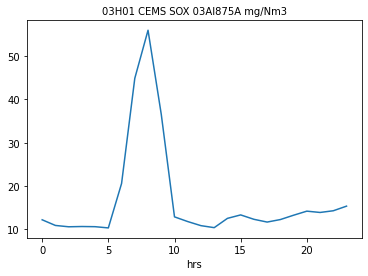

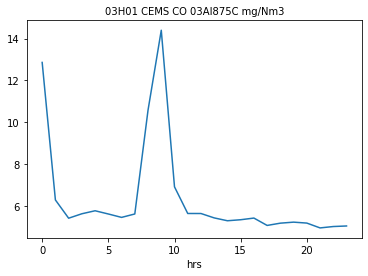

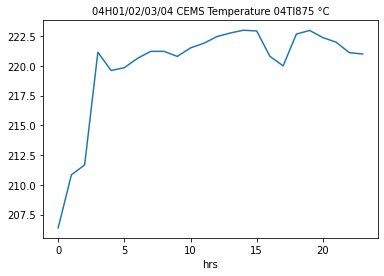

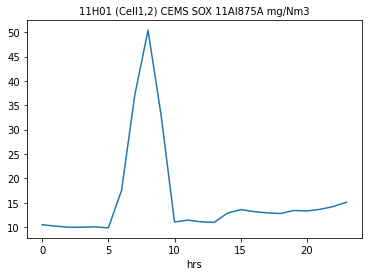

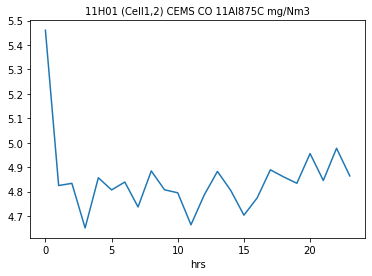

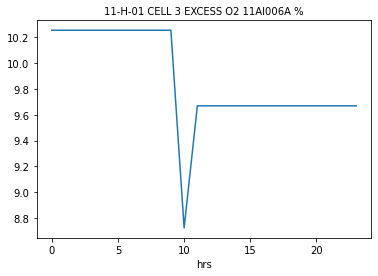

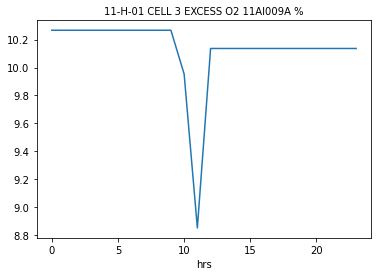

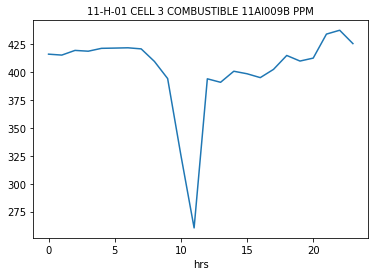

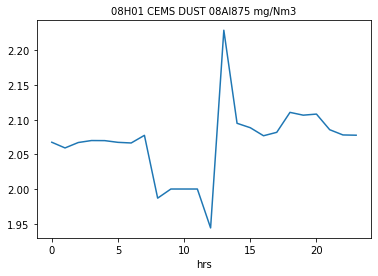

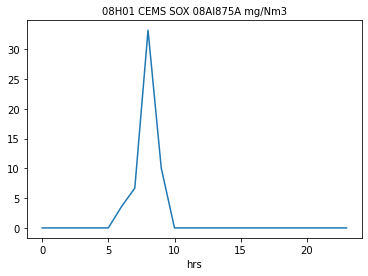

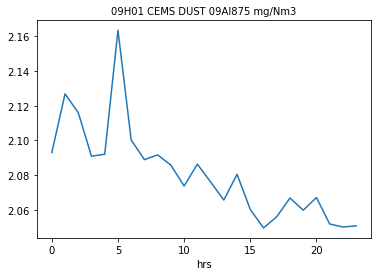

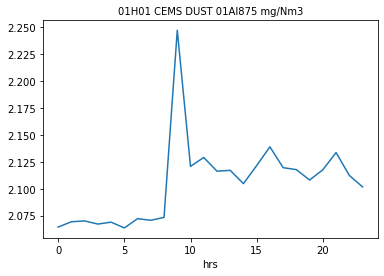

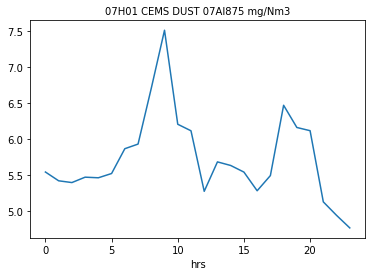

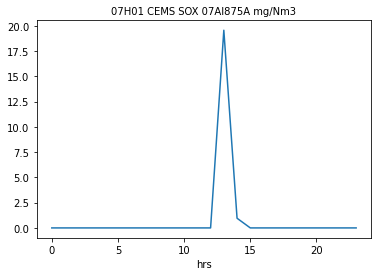

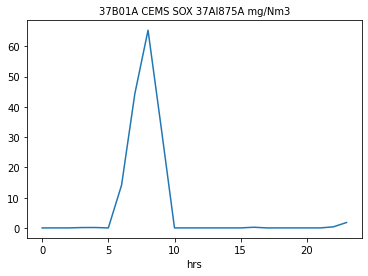

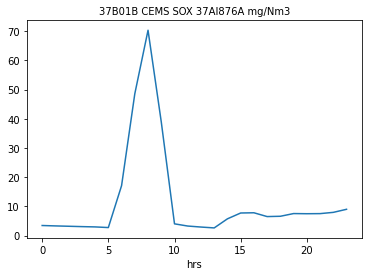

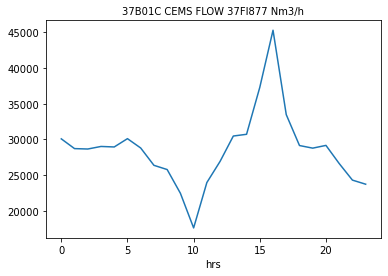

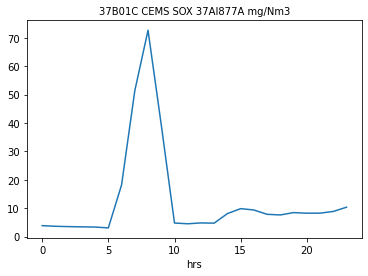

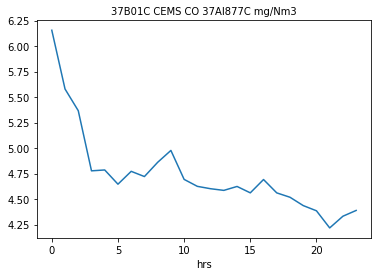

In [7]:
plotting(outlier_columns(CEMS,3))

# UNIT_01

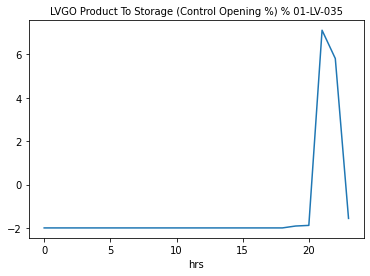

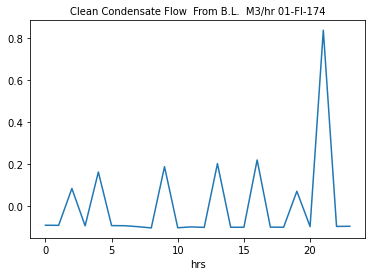

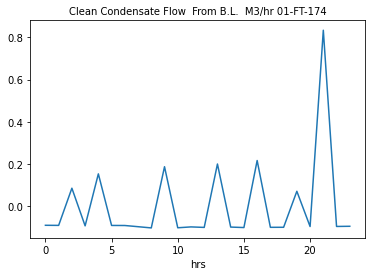

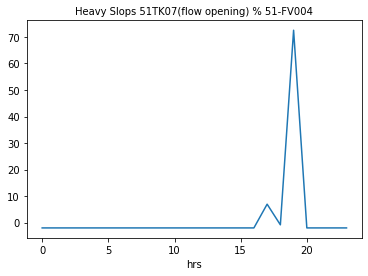

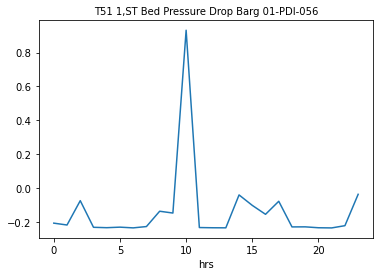

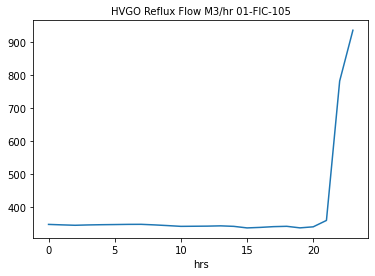

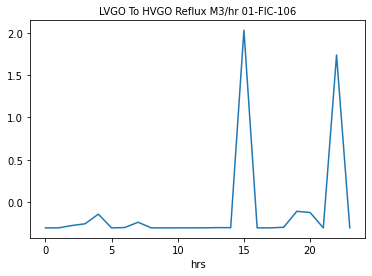

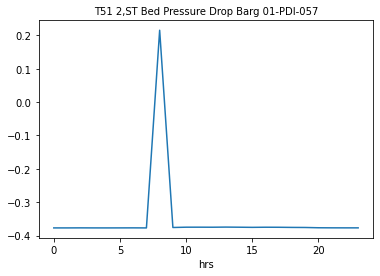

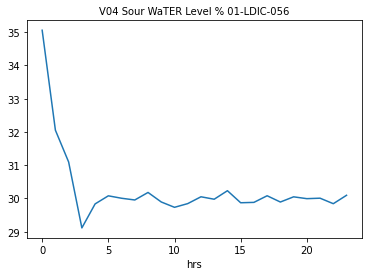

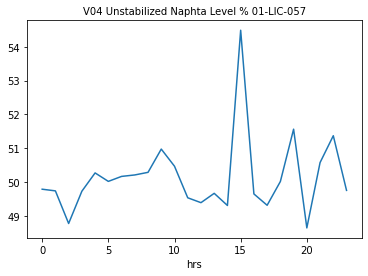

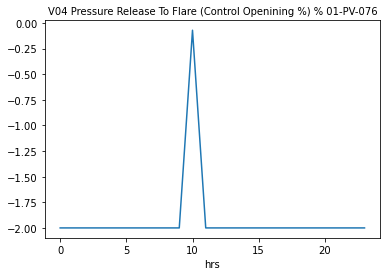

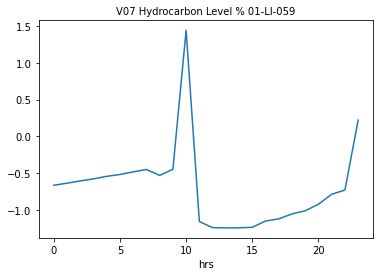

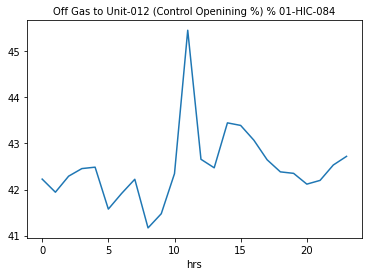

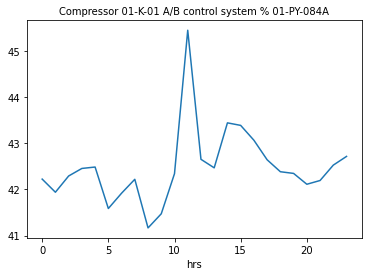

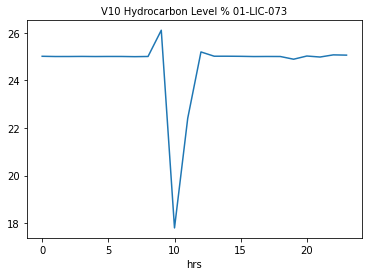

In [8]:
plotting(outlier_columns(U_1,3.5))

# UNIT_11

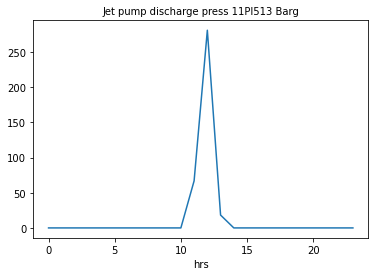

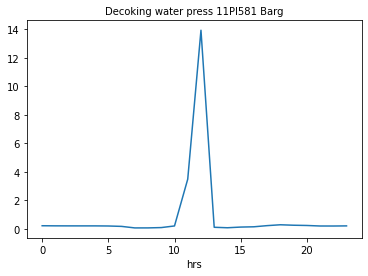

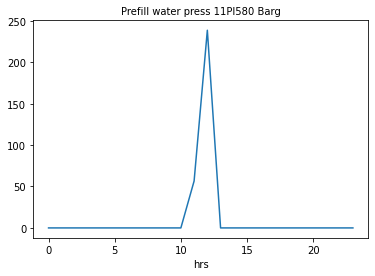

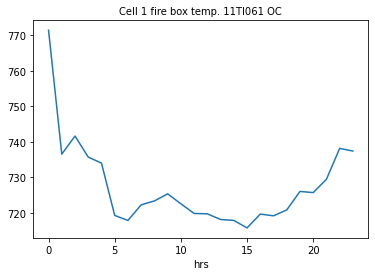

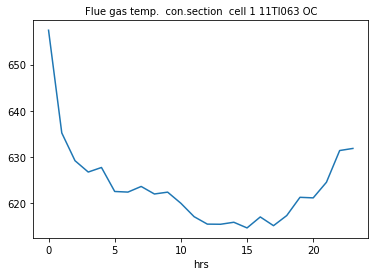

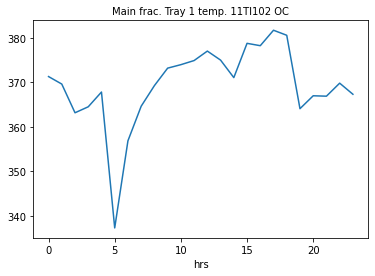

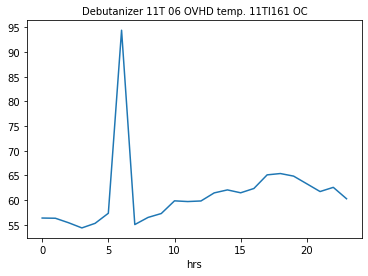

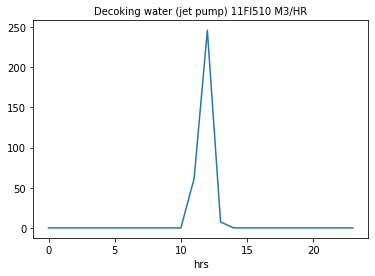

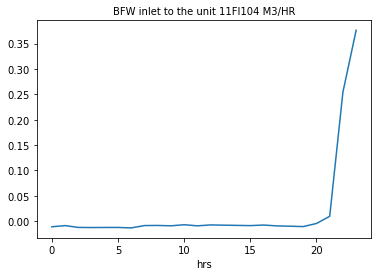

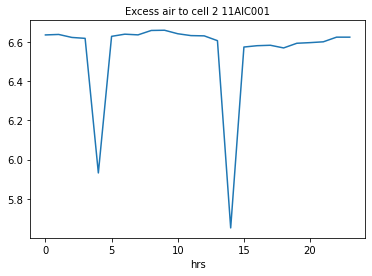

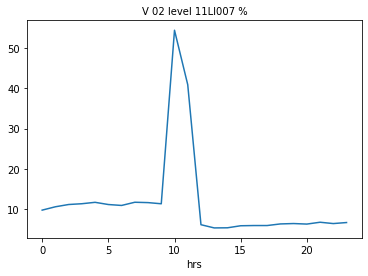

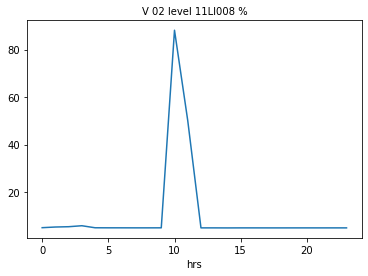

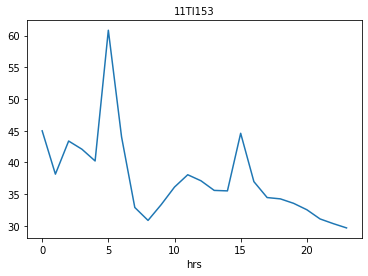

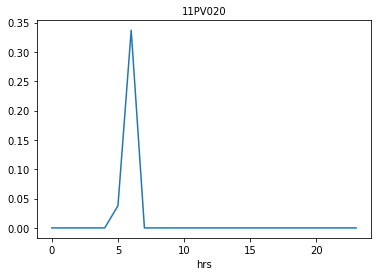

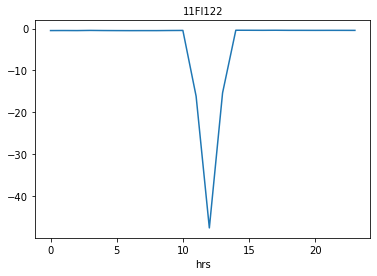

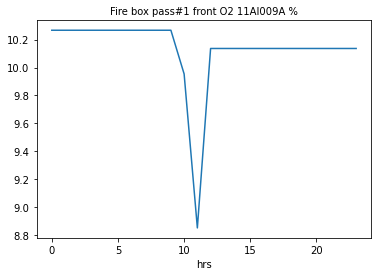

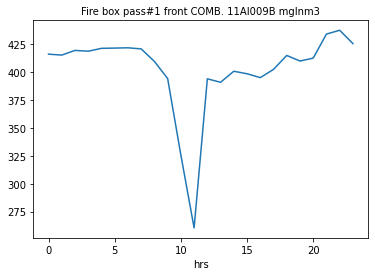

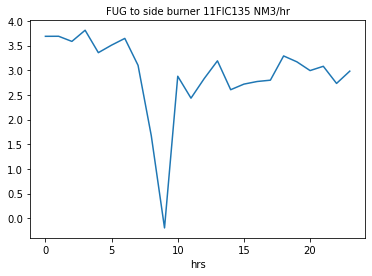

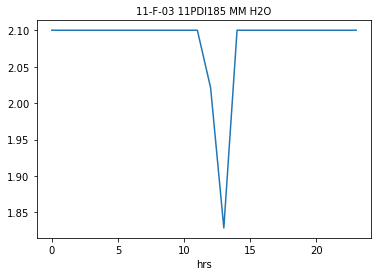

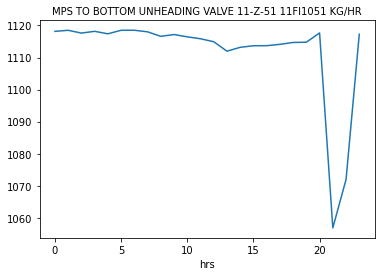

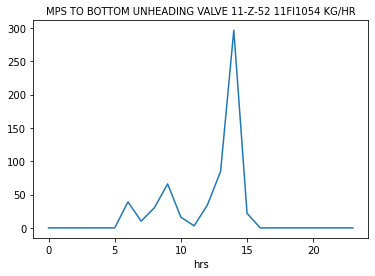

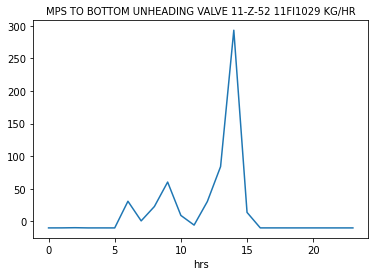

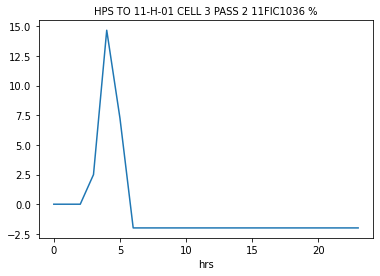

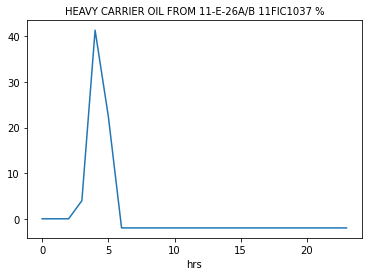

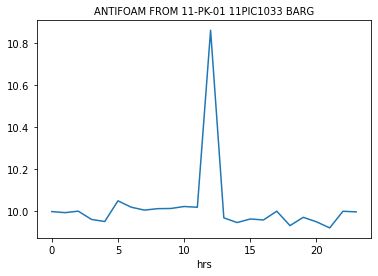

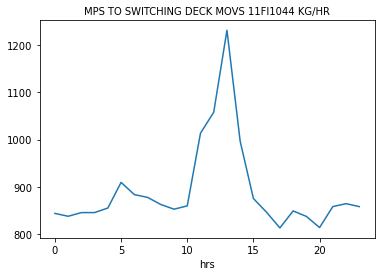

In [9]:
plotting(outlier_columns(U_11,3.5))

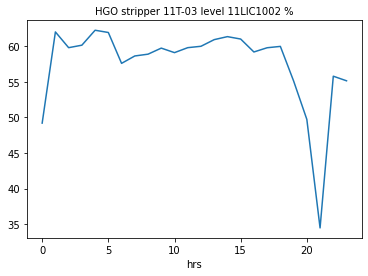

In [10]:
plotting(outlier_columns(U_11_new,3.5))

# UNIT_02/03

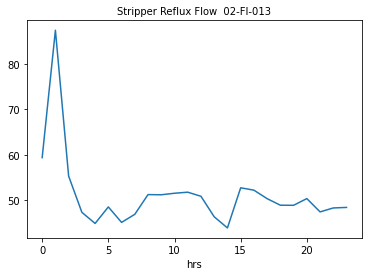

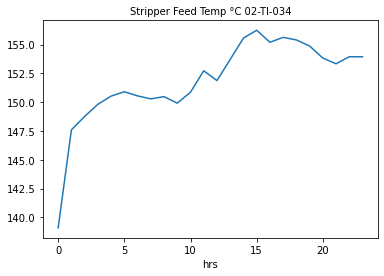

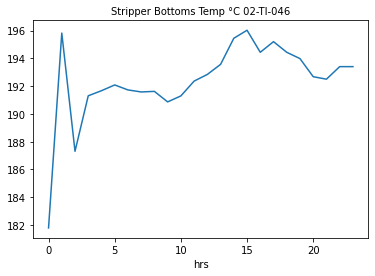

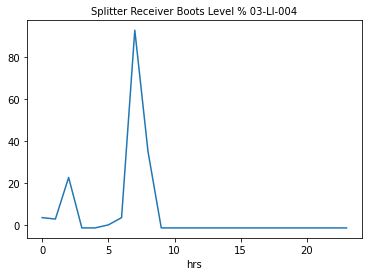

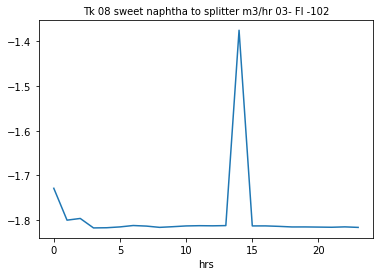

In [11]:
plotting(outlier_columns(U_2,3.5))

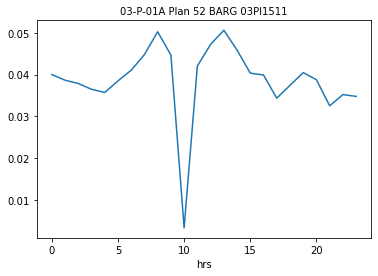

In [12]:
plotting(outlier_columns(U_2_new,3.5))

# Unit_04

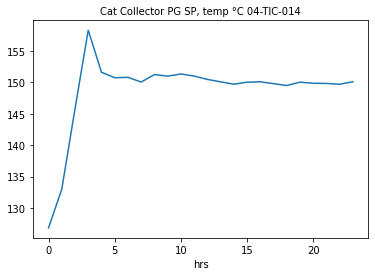

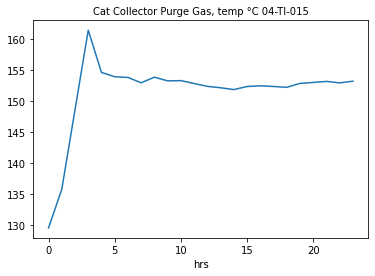

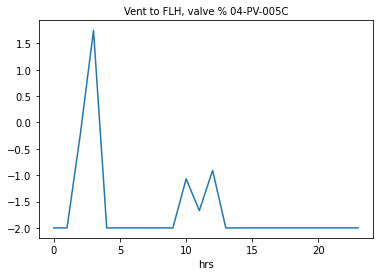

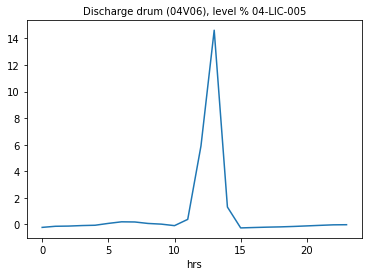

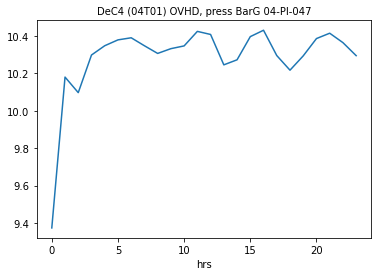

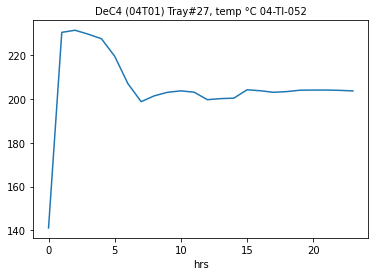

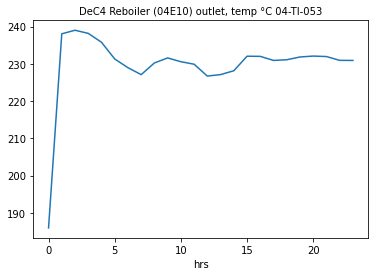

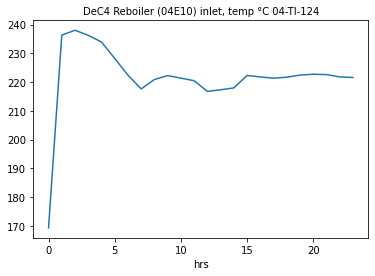

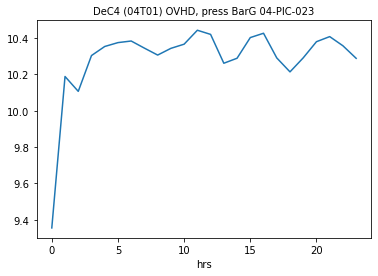

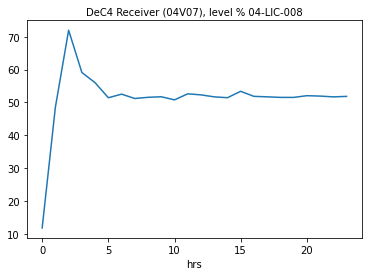

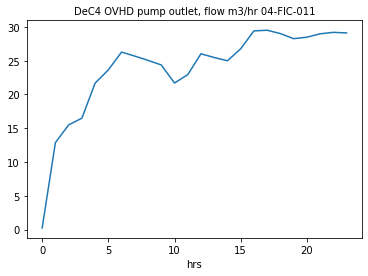

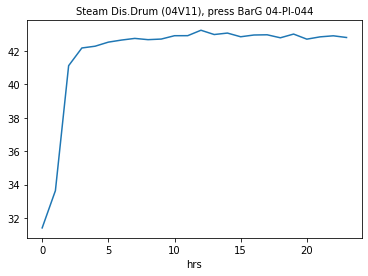

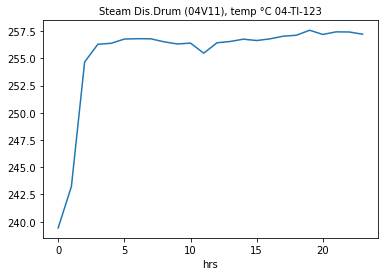

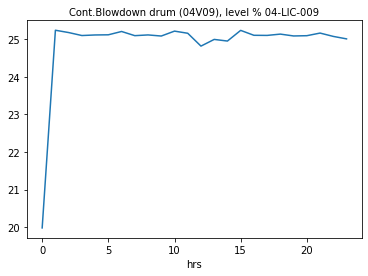

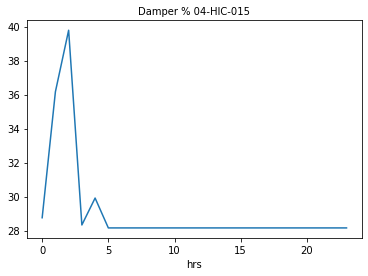

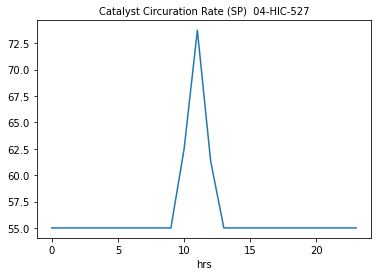

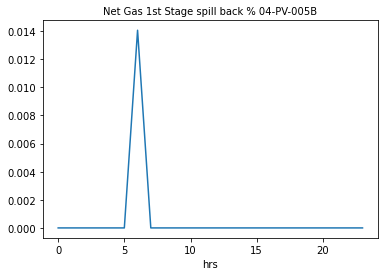

In [13]:
plotting(outlier_columns(U_4,3.5))

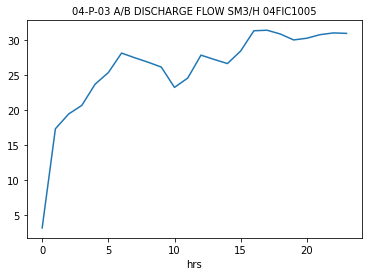

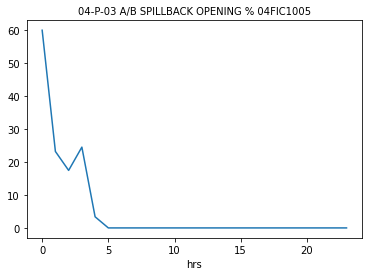

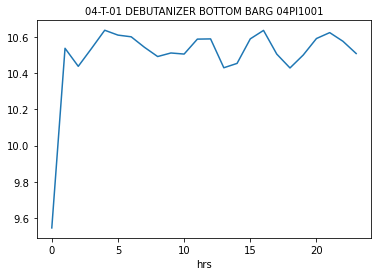

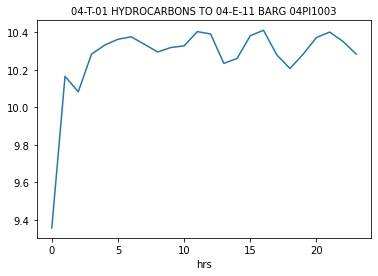

In [14]:
plotting(outlier_columns(U_4_new,3.5))

# Unit_05

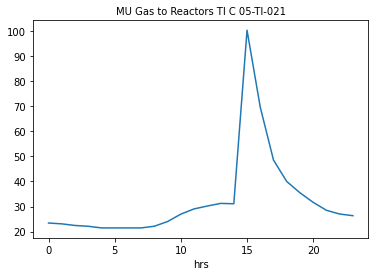

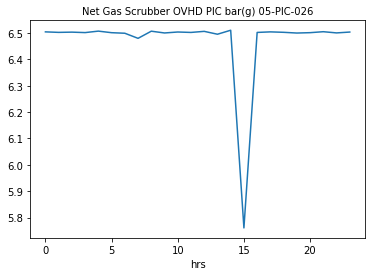

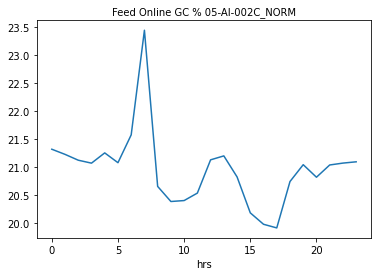

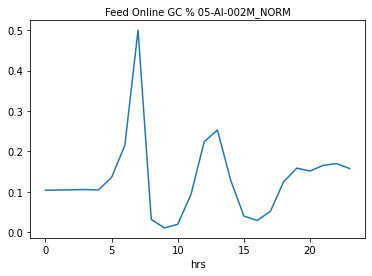

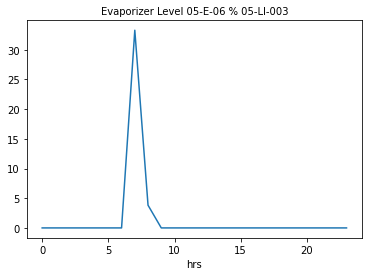

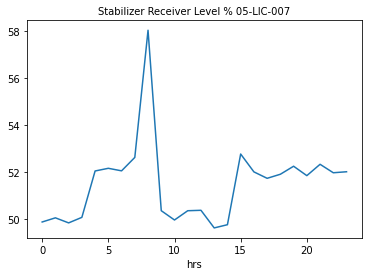

In [15]:
plotting(outlier_columns(U_5,3.5))

In [16]:
plotting(outlier_columns(U_5_new,3.5))

# Unit_12

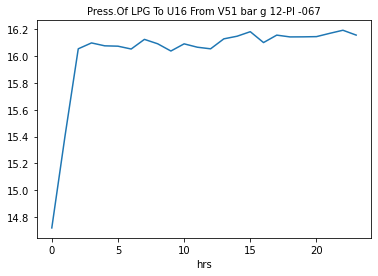

In [17]:
plotting(outlier_columns(U_12,3.5))

In [18]:
plotting(outlier_columns(U_12_new,3.5))

# Unit_25

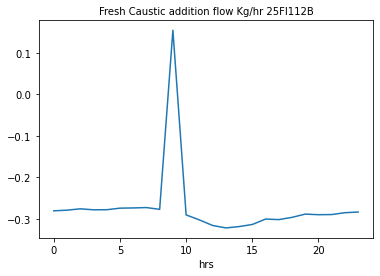

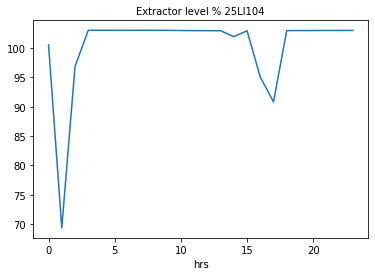

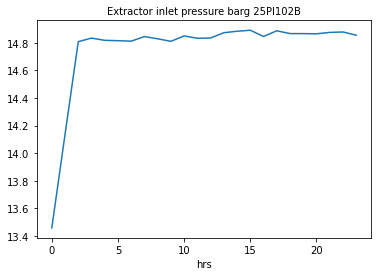

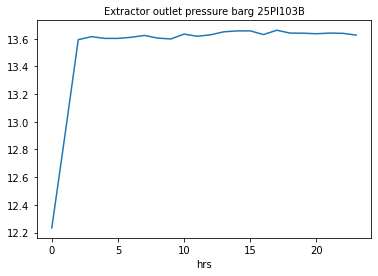

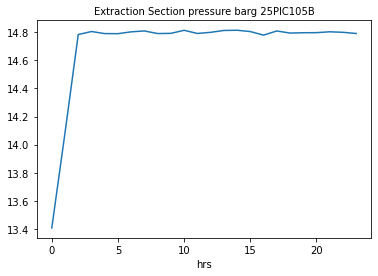

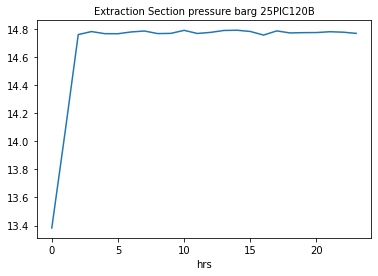

In [19]:
plotting(outlier_columns(U_25,3.5))

# DHT Unit_07

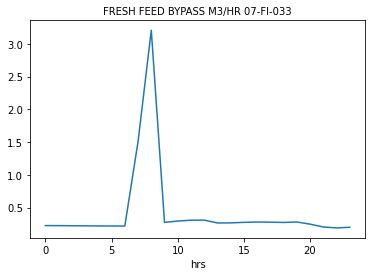

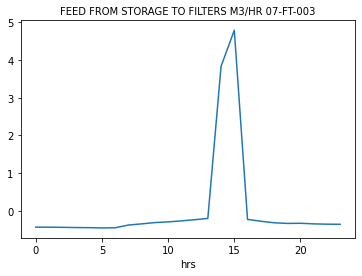

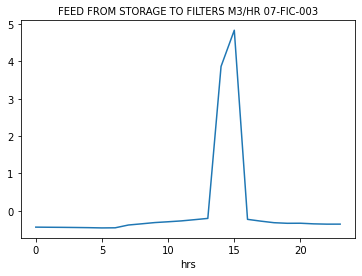

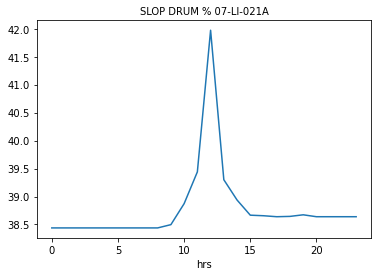

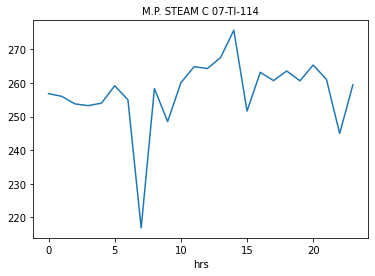

In [20]:
plotting(outlier_columns(U_7,3.5))

# SRU Unit_13

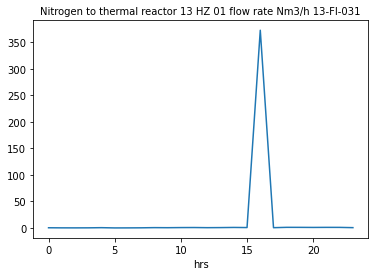

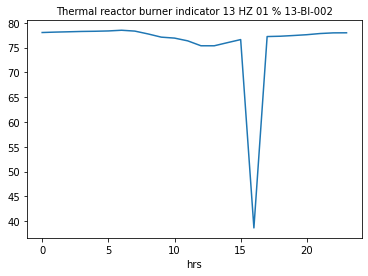

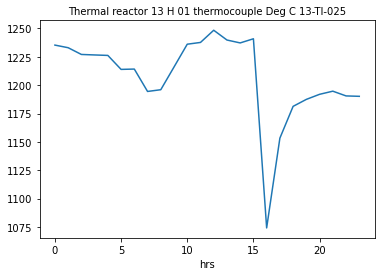

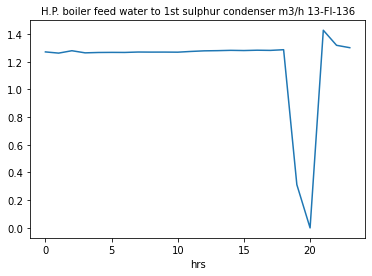

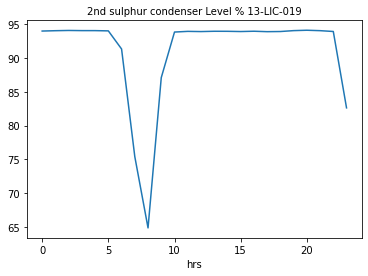

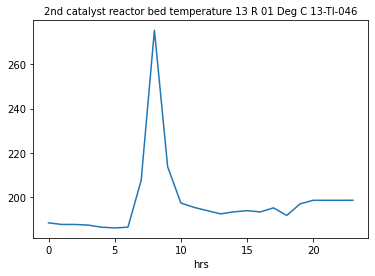

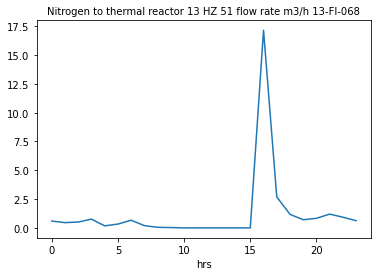

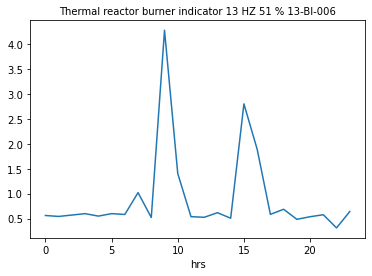

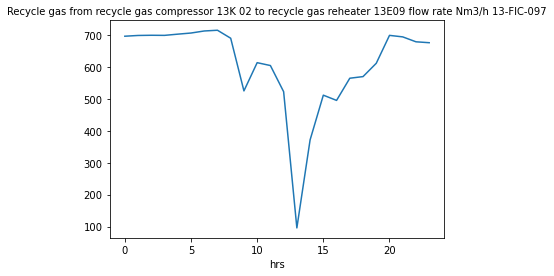

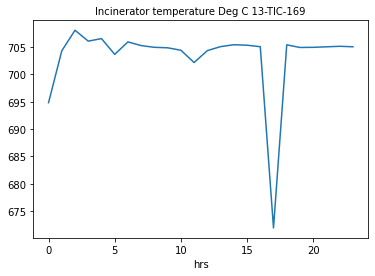

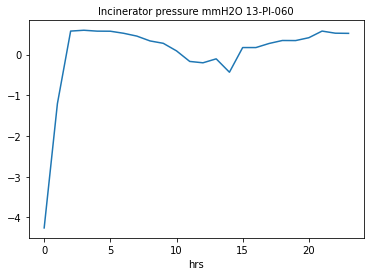

In [21]:
plotting(outlier_columns(U_13,3.5))

# Unit_14

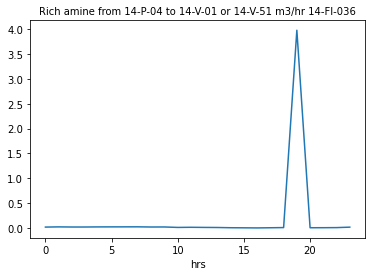

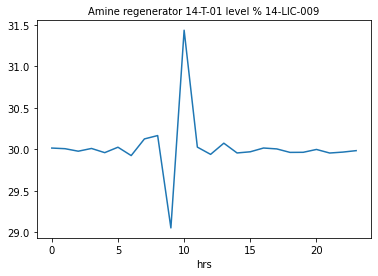

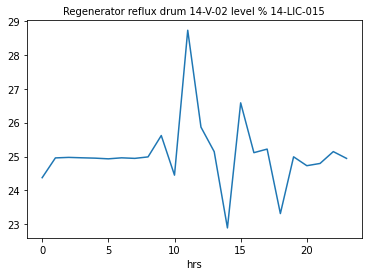

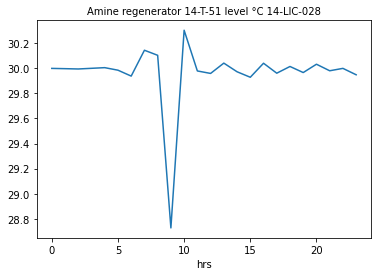

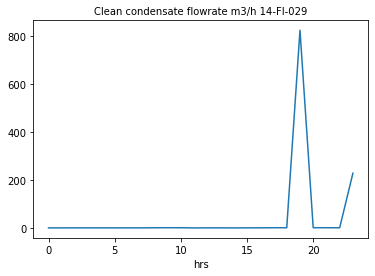

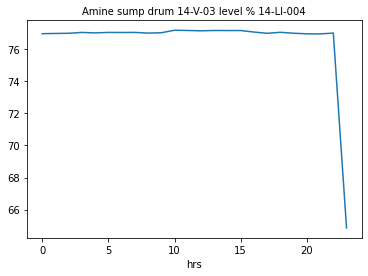

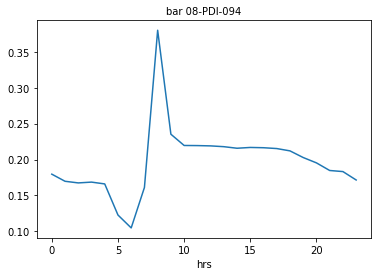

In [22]:
plotting(outlier_columns(U_14,3.5))

# Unit_15

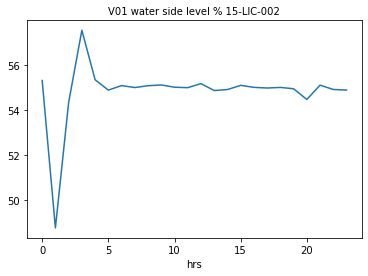

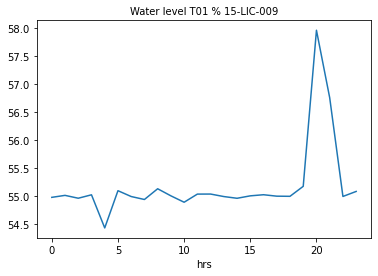

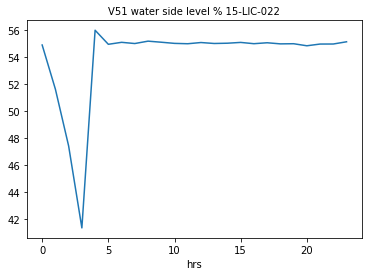

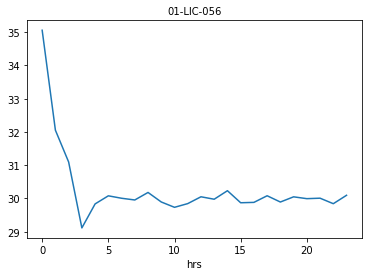

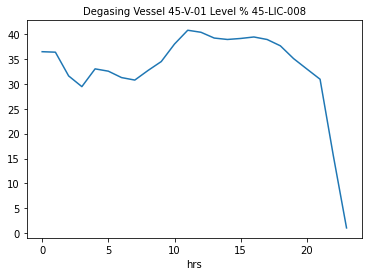

In [23]:
plotting(outlier_columns(U_15,3.5))

# Unit_08

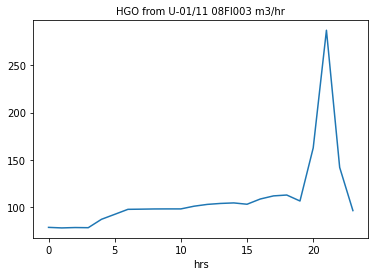

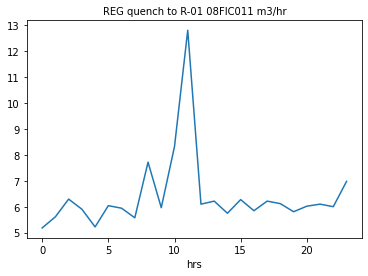

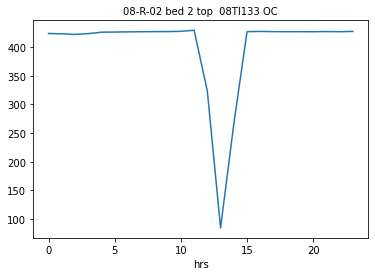

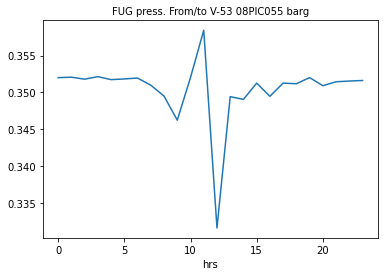

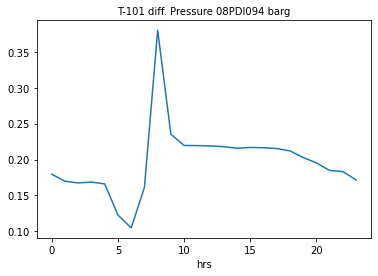

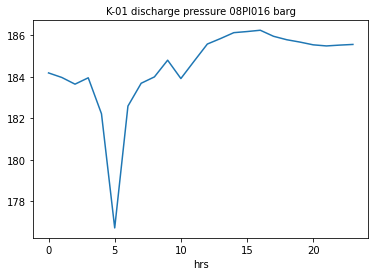

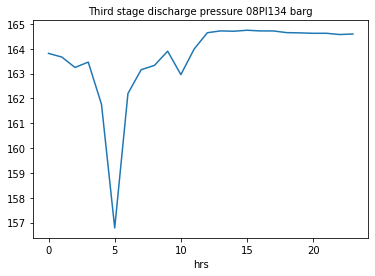

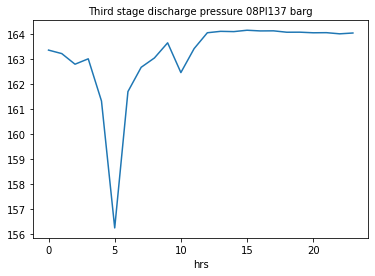

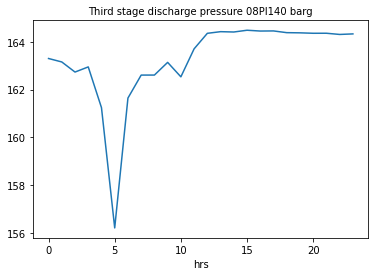

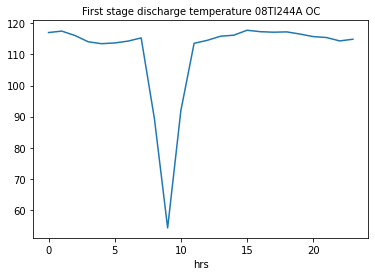

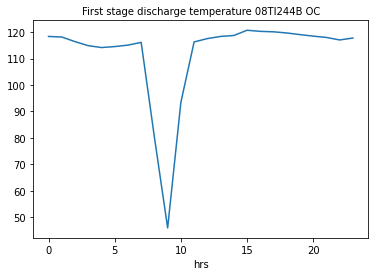

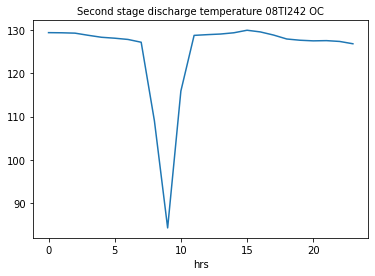

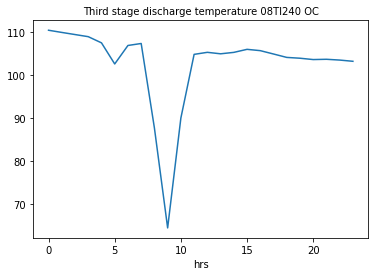

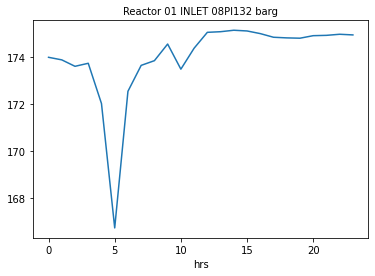

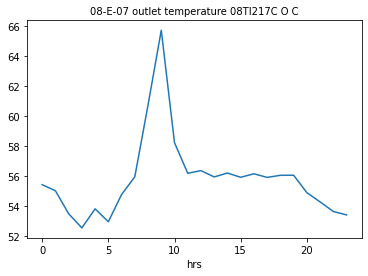

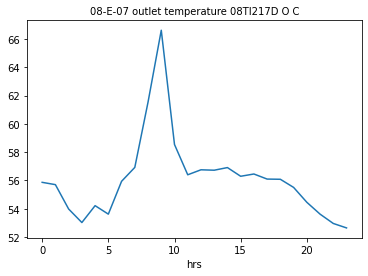

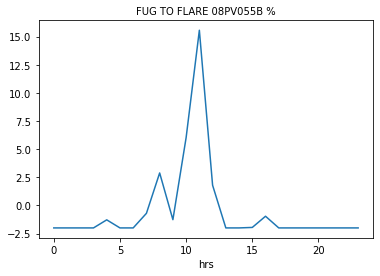

In [24]:
plotting(outlier_columns(U_8,3.5))

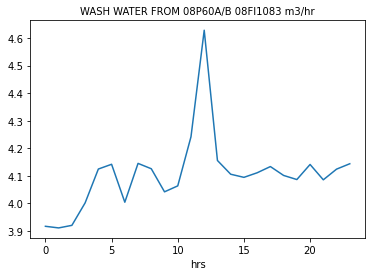

In [25]:
plotting(outlier_columns(U_8_new,3.5))

# Unit_09

In [26]:
#plotting(outlier_columns(U_9,3.5))

# Utility

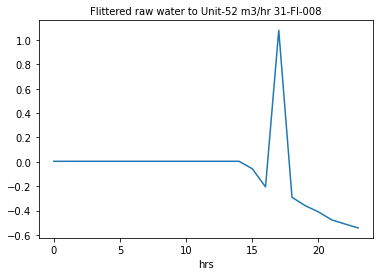

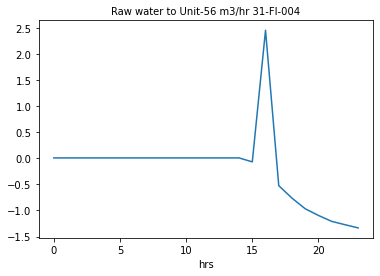

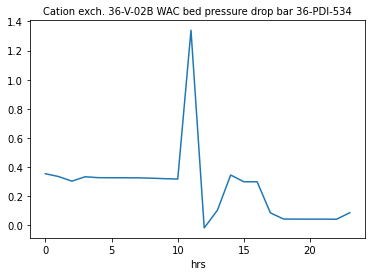

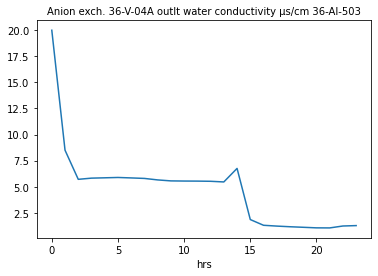

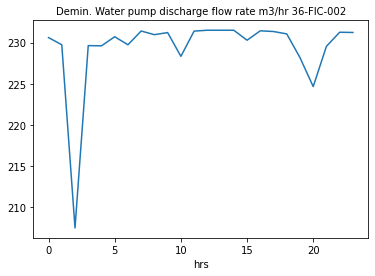

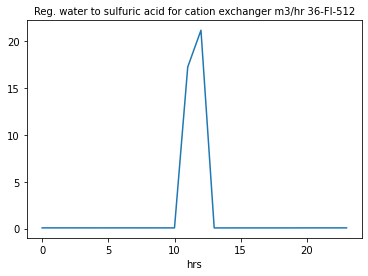

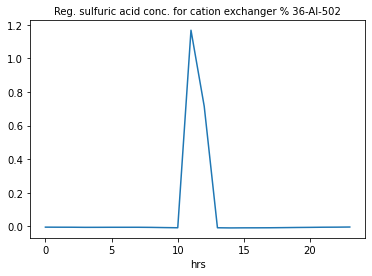

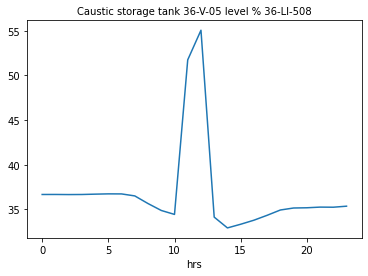

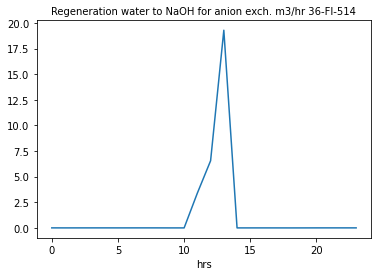

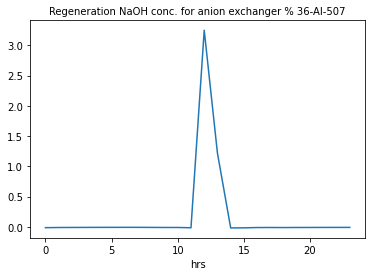

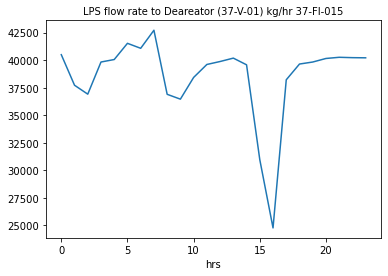

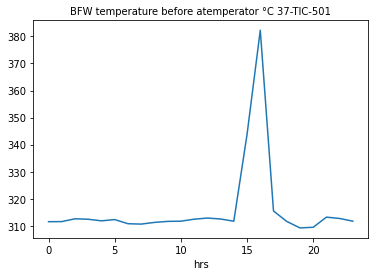

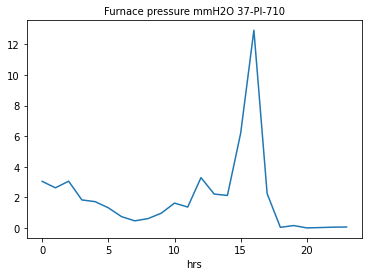

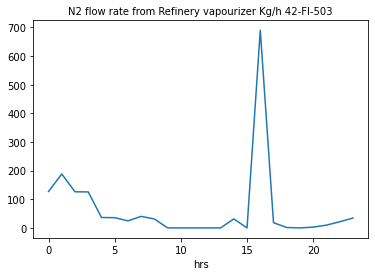

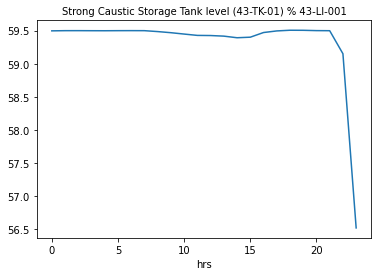

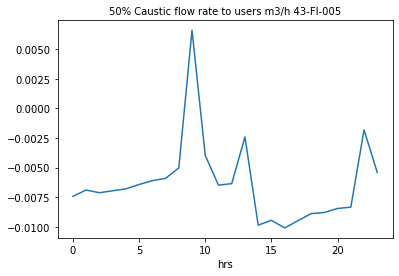

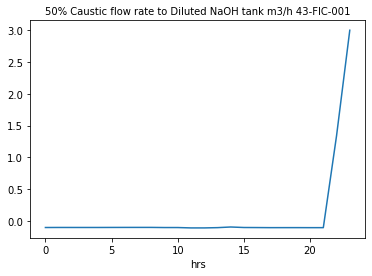

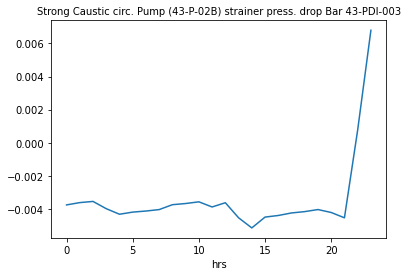

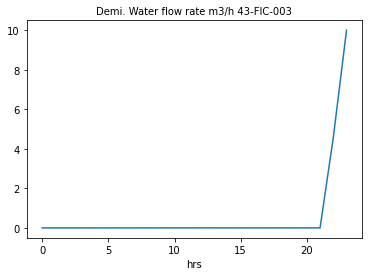

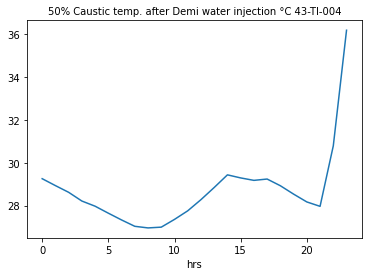

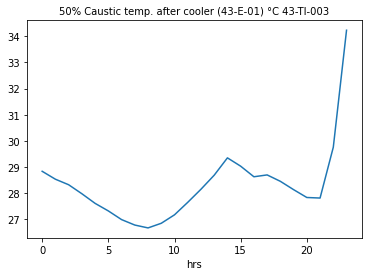

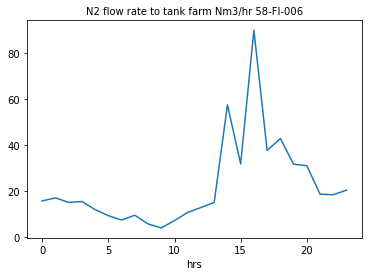

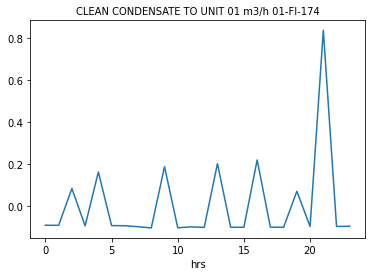

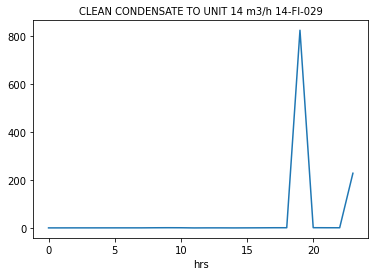

In [27]:
plotting(outlier_columns(Utility,3.5))

# Steam

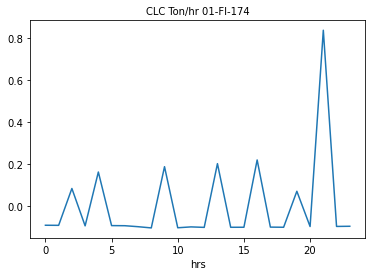

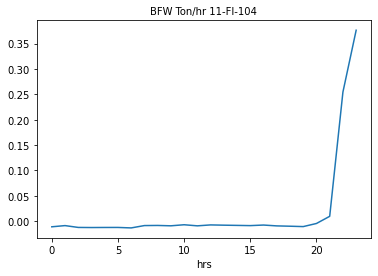

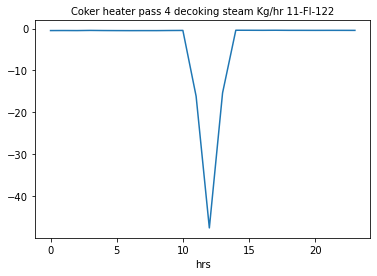

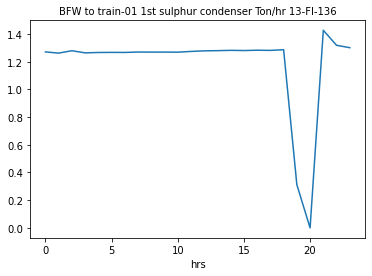

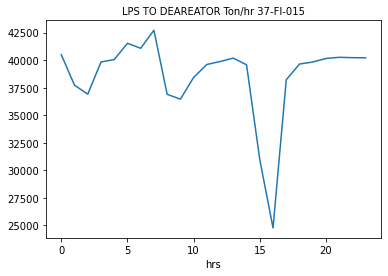

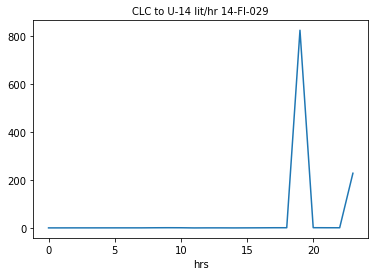

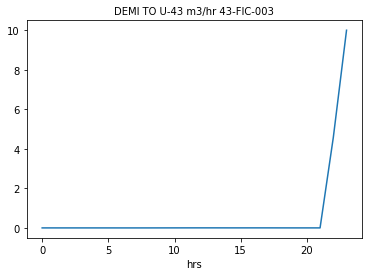

In [28]:
plotting(outlier_columns(Steam,3.5))

# Water

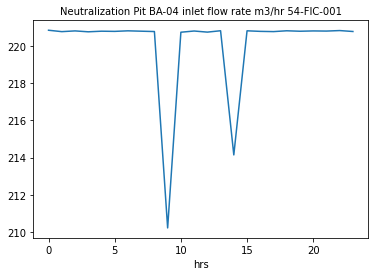

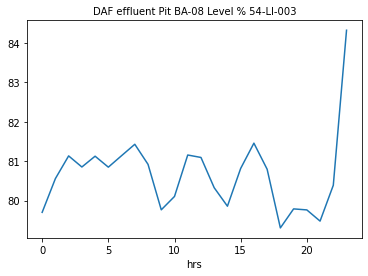

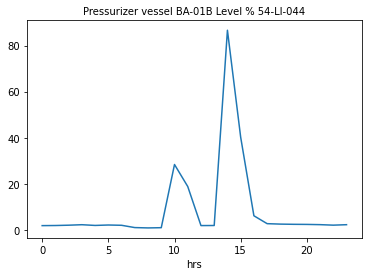

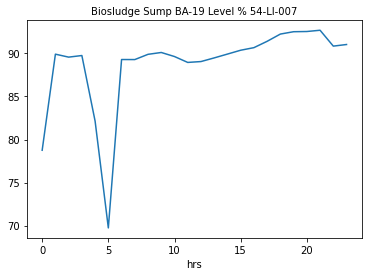

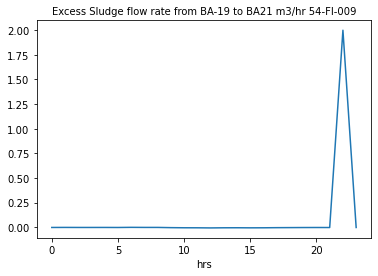

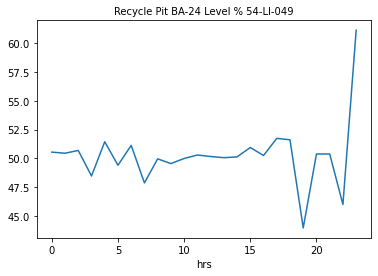

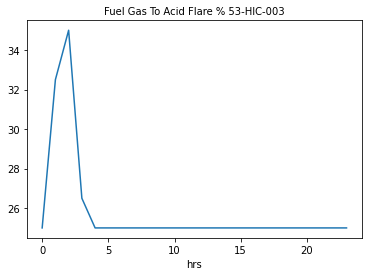

In [29]:
plotting(outlier_columns(Water,3.5))

# Condensate Return

In [30]:
plotting(outlier_columns(Conden_R,3.5))

In [31]:
os.chdir(r'C:\Users\asabri\Jupitar notes\Daily Macro Trends')

In [32]:
time.sleep(2)
pg.hotkey('ctrlleft','s')
time.sleep(2)

In [33]:
!jupyter nbconvert --to html  --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' Daily_Macro_Monitoring.ipynb 

C:\Users\asabri\Anaconda3\lib\site-packages\traitlets\traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'remove_cell' instead of "'remove_cell'" if you require traitlets >=5.
  warn(
[NbConvertApp] Converting notebook Daily_Macro_Monitoring.ipynb to html
[NbConvertApp] Writing 3409942 bytes to Daily_Macro_Monitoring.html


In [34]:
shutil.copy('Daily_Macro_Monitoring.html',path_day)

'\\\\eprom\\fs\\technical\\Macro\\2023\\03\\1_3_2023\\Daily_Macro_Monitoring.html'

In [35]:
to_list='Ahmed Atef Mohamed; ahmed mahmoud ahmed soliman; Sara El Kassaby; ahmed adel mabrok; Ahmed Mohamed Sabri; ahmed osama ahmed mohamed; Ahmed Yasser Mohamed; ali fawzy abdelwahed; Amr Hassan Abu Mady; Asmaa Mohamed Saber; Ehab Nadi; Hossam Hamdy Ibrahem; Khaled Mamdouh El-Sayed; Mahmoud Mohamed Metwally; Mahmoud Saad; Mena Melad Magdy; Mohamed Bahaa El Din Abdel Basset; Mohamed Mesbah Mahmoud Amasha; mohamed mohamed radwan; mohamed sayed salman; Mohamed Sherif Abdel Wahab; Mohammed Abd El-Shafi Mohammed Bakr; Osama Tayseer Taha; sameh abdelhameid ahmed noah; asaad aly abdelfatah'
cc_list='Sherief Magdy abdel moneim'

In [36]:
outlook = client.Dispatch('Outlook.Application')
mail = outlook.CreateItem(0)
mail.To = to_list
mail.CC = cc_list
mail.Subject = 'Daily monitoring data'
mail.Body = f'Dear Coleagues,\n\nkindly find attached daily macro deviations sheet for {os.path.basename(path_day)}\n\n\n\n\nBest Regards.'
#mail.HTMLBody = '<h2>HTML Message body</h2>' #this field is optional

# To attach a file to the email (optional):
attachment  = "C:\\Users\\asabri\\Jupitar notes\\Daily Macro Trends\\Daily_Macro_Monitoring.html"
mail.Attachments.Add(attachment)

mail.Send()